In [1]:
# K Means Clustering
# Dataset used : https://www.superdatascience.com/pages/machine-learning
# We'll try to see how many clusters

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data
df = pd.read_csv('Mall_Customers.csv')
x = df.iloc[:, 3:5].values

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


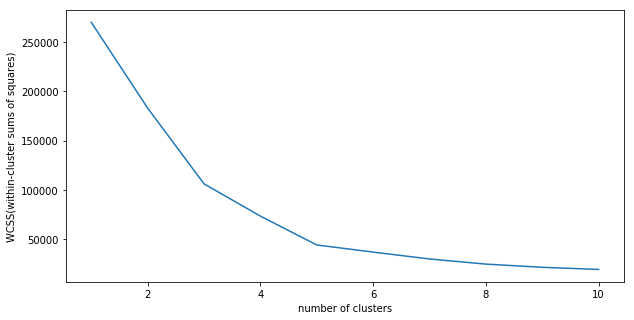

In [9]:
# Ue elbow method to find optimal number of clusters
plt.rcParams['figure.figsize'] = [10, 5]
wcss = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('number of clusters')
plt.ylabel('WCSS(within-cluster sums of squares)')


# We see that the optimal number of clusters is 5
optimal_splits = 5

In [11]:
# Make optimal clusters and train the model
kmeans = KMeans(n_clusters=5, init = 'k-means++')
kmeans = kmeans.fit(x)

# Predictions
preds = kmeans.predict(x)


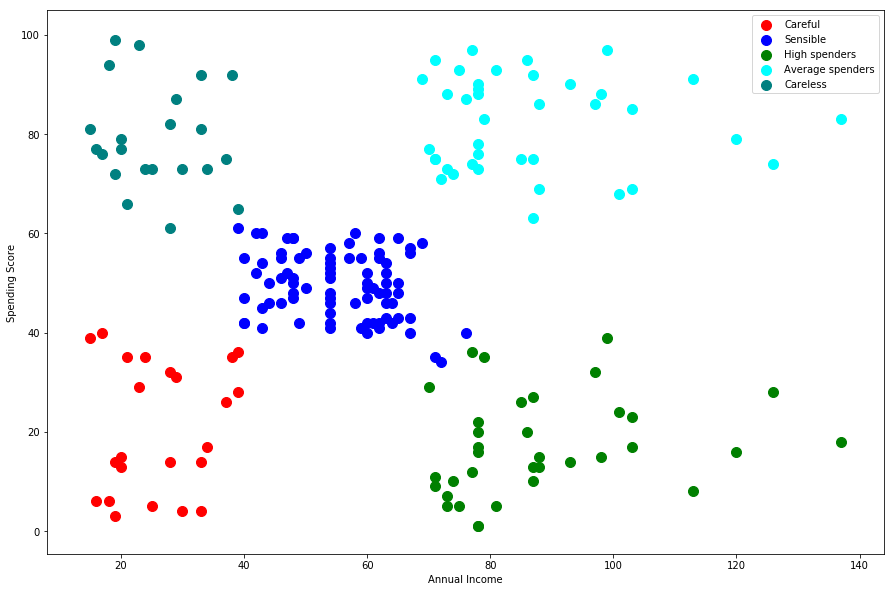

In [14]:
colors = ['red', 'blue', 'green', 'cyan', 'teal', 'magenta']
markers = ['o', '^', '*', 's', 'X', 'x']

# Visualization 2D
plt.rcParams['figure.figsize'] = [15, 10]
for i in range(optimal_splits):
    plt.scatter(x[preds == i, 0], x[preds == i, 1], color = colors[i], s = 100, marker= markers[0])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(['Careful', 'Sensible', 'High spenders', 'Average spenders', 'Careless'])

# We see that 5 clusters are formed and are labelled as such


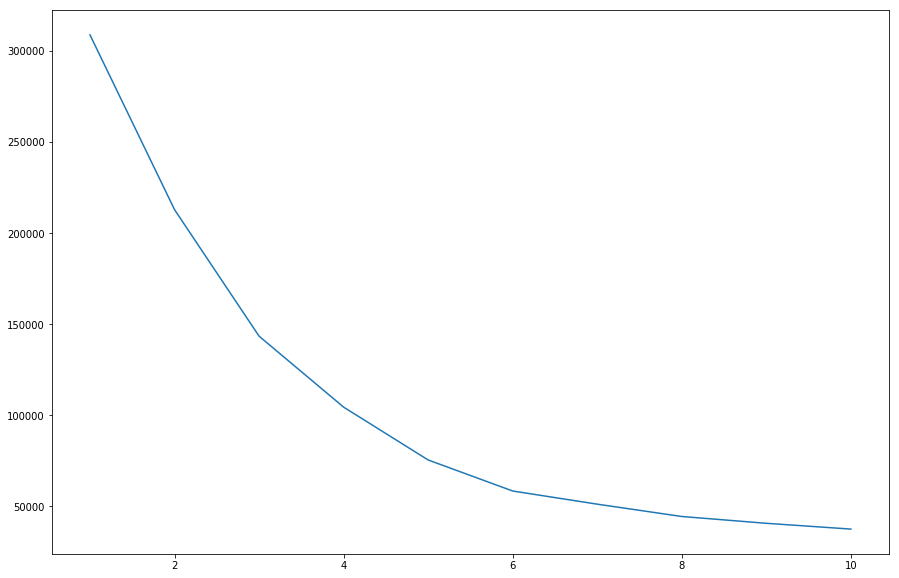

In [18]:
# 3 variables

# Import data
df = pd.read_csv('Mall_Customers.csv')
x = df.iloc[:, 2:5].values

# Ue elbow method to find optimal number of clusters
wcss = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

optimal_splits = 5

# Make optimal splits
kmeans = KMeans(n_clusters=5, init = 'k-means++')
kmeans = kmeans.fit(x)
preds = kmeans.predict(x)



<IPython.core.display.Javascript object>


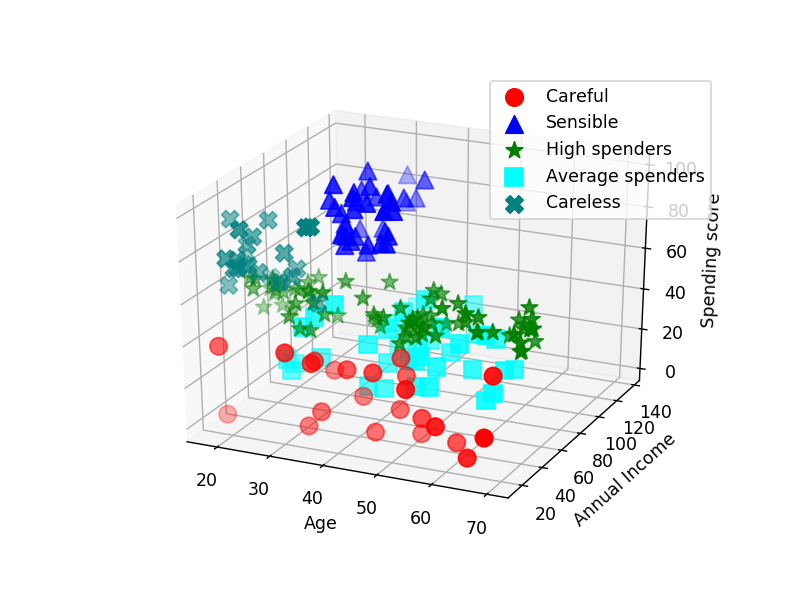

In [21]:
%matplotlib notebook
colors = ['red', 'blue', 'green', 'cyan', 'teal', 'magenta']
markers = ['o', '^', '*', 's', 'X', 'x']

# Viz 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(optimal_splits):
    ax.scatter(x[preds == i, 0], x[preds == i, 1], x[preds == i, 2], color = colors[i], s = 100, marker = markers[i])
    
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending score')
ax.legend(['Careful', 'Sensible', 'High spenders', 'Average spenders', 'Careless'])

plt.show()